In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Reading the file and showing the first 5 rows
df = pd.read_csv("shein_mens_fashion.csv")
df.head()

,product_id,sku,url,title,color,sale_price/amount,sale_price/amount_with_symbol,retail_price/amount,retail_price/amount_with_symbol,discount_percentage,category_name,category_id,description,reviews_count,average_rating
0,22039173,sm2307273039173611,https://us.shein.com/Manfinity-Homme-Men-Plus-...,Manfinity Homme Men Plus Solid Tee & Shorts,White,18.74,$18.74,26.39,$26.39,29,Men Plus Size T-Shirt Co-ords,6317,Color: White\nStyle: Casual\nPattern Type: Pla...,64,4.98
1,24808563,rm2308169291469282,https://us.shein.com/ROMWE-Street-Life-Men-Let...,ROMWE Street Life Men's Short Sleeve T-Shirt W...,Black,9.24,$9.24,12.49,$12.49,26,Men T-Shirts,1980,Color: Black\nStyle: Casual\nPattern Type: Car...,100,4.95
2,23321220,sm2309079942461816,https://us.shein.com/Manfinity-Men-Contrast-Pa...,Manfinity Men Contrast Panel Drawstring Sweatp...,Navy Blue,6.15,$6.15,14.29,$14.29,57,Men Sweatpants,2988,Color: Navy Blue\nPattern Type: Colorblock\nDe...,1000,4.87
3,27635772,sm2311021427722837,https://us.shein.com/Manfinity-Homme-Men-s-Plu...,Manfinity Homme Men's Plus Size Striped Trim S...,Apricot,13.19,$13.19,14.99,$14.99,12,Men Plus Size Polo Shirts,6307,Color: Apricot\nStyle: Casual\nPattern Type: P...,24,4.92
4,30885163,sm2403027733789007,https://us.shein.com/Mens-Fitness-Taco-Funny-T...,Mens Fitness Taco Funny T Shirt Humorous Gym G...,Heather Red,11.99,$11.99,11.99,$11.99,0,Men T-Shirts,1980,Color: Heather Red\nStyle: Casual\nLength: Reg...,0,0.00


In [3]:
# We observe that we have 1000 entries (or different products) and 15 variables, with types that match what they represent
print(df.shape)
print(df.info())

(1000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   product_id                       1000 non-null   int64  
 1   sku                              1000 non-null   object 
 2   url                              1000 non-null   object 
 3   title                            1000 non-null   object 
 4   color                            1000 non-null   object 
 5   sale_price/amount                1000 non-null   float64
 6   sale_price/amount_with_symbol    1000 non-null   object 
 7   retail_price/amount              1000 non-null   float64
 8   retail_price/amount_with_symbol  1000 non-null   object 
 9   discount_percentage              1000 non-null   int64  
 10  category_name                    1000 non-null   object 
 11  category_id                      1000 non-null   int64  
 12  descriptio

In [4]:
# Checking that there are no missing values in any column
df.isnull().sum()

product_id                         0
sku                                0
url                                0
title                              0
color                              0
sale_price/amount                  0
sale_price/amount_with_symbol      0
retail_price/amount                0
retail_price/amount_with_symbol    0
discount_percentage                0
category_name                      0
category_id                        0
description                        0
reviews_count                      0
average_rating                     0
dtype: int64

CODIFICACIÓN DE VARIABLES

In [5]:
# Value counts for the 'color' column
df["color"].value_counts()


color
Black                              196
Multicolor                         149
White                              104
Khaki                               67
Apricot                             31
Grey                                31
Navy Blue                           29
Dark Grey                           29
Army Green                          26
Blue                                22
Light Wash                          20
Green                               20
Black and White                     19
Light Grey                          18
Pink                                17
Beige                               16
Burgundy                            15
Red                                 14
Dusty Blue                          13
Baby Blue                           12
Dark Green                          12
Brown                               12
Mint Green                          11
Medium Wash                         10
Coffee Brown                         9
Blue and White     

In [6]:
# Creating the color mapping dictionary
color_mapping = {
    'Black': 'Black',
    'Multicolor': 'Multicolor',
    'White': 'White',
    'Khaki': 'Beige',
    'Apricot': 'Beige',
    'Grey': 'Gray',
    'Navy Blue': 'Blue',
    'Dark Grey': 'Gray',
    'Army Green': 'Green',
    'Blue': 'Blue',
    'Light Wash': 'Blue',
    'Green': 'Green',
    'Black and White': 'Black & White',
    'Light Grey': 'Gray',
    'Pink': 'Pink',
    'Beige': 'Beige',
    'Burgundy': 'Red',
    'Red': 'Red',
    'Dusty Blue': 'Blue',
    'Baby Blue': 'Blue',
    'Dark Green': 'Green',
    'Brown': 'Brown',
    'Mint Green': 'Green',
    'Medium Wash': 'Blue',
    'Coffee Brown': 'Brown',
    'Blue and White': 'Blue',
    'Dark Wash': 'Blue',
    'Heather Black': 'Gray',
    'Yellow': 'Yellow',
    'Royal Blue': 'Blue',
    'Baby Pink': 'Pink',
    'Camel': 'Beige',
    'Orange': 'Orange',
    'Burnt Orange': 'Orange',
    'Dusty Pink': 'Pink',
    'Chocolate Brown': 'Brown',
    'Mint Blue': 'Blue',
    'Violet Purple': 'Purple',
    'Hot Pink': 'Pink',
    'Mauve Purple': 'Purple',
    'Purple': 'Purple',
    'Teal Blue': 'Blue',
    'Bronze': 'Brown',
    'Heather Navy': 'Blue',
    'Heather Green': 'Green',
    'Heather Navy - UNIPORN': 'Blue',
    'Heather Red - DICKENS': 'Red',
    'Light Heather Blue - PEN': 'Blue',
    'Heather Navy - Kid Has Practice': 'Blue',
    'Mustard Yellow': 'Yellow',
    'Dark Heather Grey': 'Gray',
    'Coral Pink': 'Pink',
    'Heather Red': 'Red',
    'Light Heather Grey': 'Gray',
    'Heather Navy - MATH': 'Blue',
    'Heather Black - 100% Chance': 'Gray',
    'Dark Heather Grey - BOOK': 'Gray',
    'Heather Light Blue': 'Blue',
    'Red and White': 'Red',
    'Lilac Purple': 'Purple'
}


df['color'] = df['color'].replace(color_mapping)


In [7]:
# Value counts for the 'category_name' column
df["category_name"].value_counts()


category_name
Men T-Shirts                                 224
Men Shirts                                    81
Men Shorts                                    78
Men Polo Shirts                               69
Men Jeans                                     66
Men Beach Shorts                              63
Men T-Shirt Co-ords                           57
Men Pants                                     55
Men Shirt Co-ords                             35
Men Sweatpants                                33
Men Plus Size T-Shirts                        25
Men Hoodies                                   22
Men Plus Size Shirts                          19
Men Sweatshirts                               16
Men Plus Size T-Shirt Co-ords                 15
Men Plus Size Shirt Co-ords                   15
Men Jackets & Coats                           15
Men Suits                                     10
Men Suit Pants                                10
Men Hoodie & Sweatshirt Co-ords                9
Men Sw

In [8]:
# Category mapping dictionary
category_map = {
    'Men T-Shirts': 'Men T-Shirts',
    'Men Shirts': 'Men Shirts',
    'Men Polo Shirts': 'Men T-Shirts',
    'Men Jeans': 'Men Jeans',
    'Men Beach Shorts': 'Men Shorts',
    'Men T-Shirt Co-ords': 'Men T-Shirts',
    'Men Pants': 'Men Pants',
    'Men Shirt Co-ords': 'Men Shirts',
    'Men Sweatpants': 'Men Pants',
    'Men Plus Size T-Shirts': 'Men T-Shirts',
    'Men Hoodies': 'Men Hoodies',
    'Men Plus Size Shirts': 'Men Shirts',
    'Men Sweatshirts': 'Men Hoodies',
    'Men Plus Size T-Shirt Co-ords': 'Men T-Shirts',
    'Men Plus Size Shirt Co-ords': 'Men Shirts',
    'Men Jackets & Coats': 'Men Jackets & Coats',
    'Men Suits': 'Men Suits',
    'Men Suit Pants': 'Men Suits',
    'Men Hoodie & Sweatshirt Co-ords': 'Men Hoodies',
    'Men Sweaters': 'Men Sweaters',
    'Men Plus Size Polo Shirts': 'Men T-Shirts',
    'Men Zip-up Hoodies': 'Men Hoodies',
    'Men Tank Tops': 'Men Tank Tops',
    'Men Plus Size Suits': 'Men Suits',
    'Men Denim Shorts': 'Men Shorts',
    'Men Plus Size Shorts': 'Men Shorts',
    'Men Plus Size Jackets & Coats': 'Men Jackets & Coats',
    'Men Plus Size Pants': 'Men Pants',
    'Men Blazers': 'Men Blazers',
    'Men Plus Size Jeans': 'Men Jeans',
    'Men Denim Shirts': 'Men Shirts',
    'Men Plus Size Beach Shorts': 'Men Shorts',
    'Men Knit Tops': 'Men Tops',
    'Men Outerwear Co-ords': 'Men Outerwear',
    'Men Denim Jackets': 'Men Jackets & Coats',
    'Men Plus Size Hoodies': 'Men Hoodies',
    'Men Plus Size Hoodie & Sweatshirt Co-ords': 'Men Hoodies',
    'Men Plus Size Polo Co-ords': 'Men T-Shirts',
    'Men Plus Size Blazers': 'Men Blazers',
    'Men Overcoats': 'Men Outerwear',
    'Men Winter Coats': 'Men Outerwear',
    'Men Plus Size Denim Shirts': 'Men Shirts',
    'Men Polo Co-ords': 'Men T-Shirts',
    'Men Plus Size Sweatshirts': 'Men Hoodies',
    'Men Plus Size Tank Tops': 'Men Tank Tops',
    'Men Plus Size Outerwear Co-ords': 'Men Outerwear',
    'Men Cardigans': 'Men Outerwear',
    'Men Shackets': 'Men Outerwear',
    'Men Plus Size Trench Coats': 'Men Outerwear'
}

# Replace category names using the dictionary
df['category_name'] = df['category_name'].replace(category_map)
# Checking the updated count of categories
df['category_name'].value_counts()
df.head(5)


,product_id,sku,url,title,color,sale_price/amount,sale_price/amount_with_symbol,retail_price/amount,retail_price/amount_with_symbol,discount_percentage,category_name,category_id,description,reviews_count,average_rating
0,22039173,sm2307273039173611,https://us.shein.com/Manfinity-Homme-Men-Plus-...,Manfinity Homme Men Plus Solid Tee & Shorts,White,18.74,$18.74,26.39,$26.39,29,Men T-Shirts,6317,Color: White\nStyle: Casual\nPattern Type: Pla...,64,4.98
1,24808563,rm2308169291469282,https://us.shein.com/ROMWE-Street-Life-Men-Let...,ROMWE Street Life Men's Short Sleeve T-Shirt W...,Black,9.24,$9.24,12.49,$12.49,26,Men T-Shirts,1980,Color: Black\nStyle: Casual\nPattern Type: Car...,100,4.95
2,23321220,sm2309079942461816,https://us.shein.com/Manfinity-Men-Contrast-Pa...,Manfinity Men Contrast Panel Drawstring Sweatp...,Blue,6.15,$6.15,14.29,$14.29,57,Men Pants,2988,Color: Navy Blue\nPattern Type: Colorblock\nDe...,1000,4.87
3,27635772,sm2311021427722837,https://us.shein.com/Manfinity-Homme-Men-s-Plu...,Manfinity Homme Men's Plus Size Striped Trim S...,Beige,13.19,$13.19,14.99,$14.99,12,Men T-Shirts,6307,Color: Apricot\nStyle: Casual\nPattern Type: P...,24,4.92
4,30885163,sm2403027733789007,https://us.shein.com/Mens-Fitness-Taco-Funny-T...,Mens Fitness Taco Funny T Shirt Humorous Gym G...,Red,11.99,$11.99,11.99,$11.99,0,Men T-Shirts,1980,Color: Heather Red\nStyle: Casual\nLength: Reg...,0,0.00


# INITIAL POPULARITY ANALYSIS

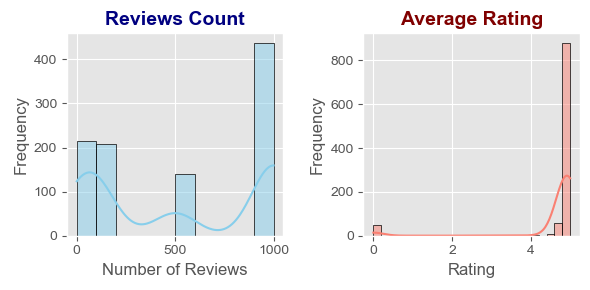

In [9]:
# Create the figure and axes objects
fig, axs = plt.subplots(1, 2, figsize=(6, 3))


# Histogram for "reviews_count"
sns.histplot(data=df, x="reviews_count", bins=10, ax=axs[0], color='skyblue', edgecolor='black', kde=True)
axs[0].set_title("Reviews Count", fontsize=14, fontweight='bold', color='navy')
axs[0].set_xlabel("Number of Reviews", fontsize=12)
axs[0].set_ylabel("Frequency", fontsize=12)


# Histogram for "average_rating"
sns.histplot(data=df, x="average_rating", bins=25, ax=axs[1], color='salmon', edgecolor='black', kde=True)
axs[1].set_title("Average Rating", fontsize=14, fontweight='bold', color='maroon')
axs[1].set_xlabel("Rating", fontsize=12)
axs[1].set_ylabel("Frequency", fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Proportions with respect to the total (top rated products with reviews count >= 1000)
proportions_respect_total = df.loc[(df["average_rating"] == 5) & (df["reviews_count"] >= 1000)].value_counts("category_name", normalize=True)

# Setting the Seaborn style
sns.set_theme(style="whitegrid")


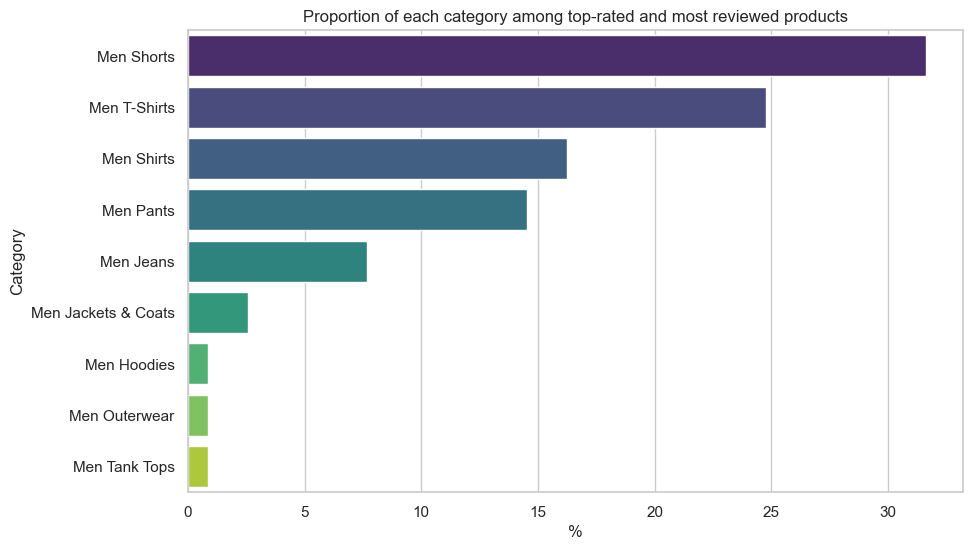

In [10]:
# Example data: proportions with respect to the total
df_proportions = proportions_respect_total.reset_index()
df_proportions.columns = ['category_name', 'proportion']
df_proportions["proportion"] = df_proportions["proportion"] * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_proportions, x='proportion', y='category_name', hue="category_name", legend=False, palette='viridis')

# Labels and title
plt.xlabel('%')
plt.ylabel('Category')
plt.title('Proportion of each category among top-rated and most reviewed products')
plt.show()

In [11]:
# Sorting by average rating in descending order
df.sort_values(by="average_rating", ascending=False)

# Viewing products with ratings between 1 and 2.5, and reviews greater than 0
df.loc[(df["average_rating"] > 1) & (df["average_rating"] < 2.5) & (df["reviews_count"] > 0)].head()

,product_id,sku,url,title,color,sale_price/amount,sale_price/amount_with_symbol,retail_price/amount,retail_price/amount_with_symbol,discount_percentage,category_name,category_id,description,reviews_count,average_rating
898,28627364,sm2311174494418818,https://us.shein.com/Manfinity-Hypemode-Men-S-...,Manfinity Hypemode Men'S Plus Size Color-Block...,Multicolor,11.5,$11.50,18.79,$18.79,39,Men Jackets & Coats,6300,Color: Multicolor\nStyle: Casual\nPattern Type...,1,2.0


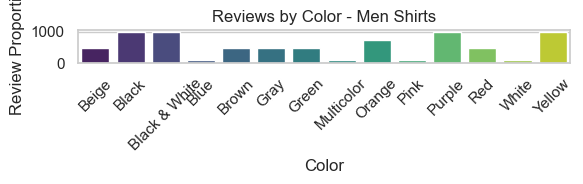

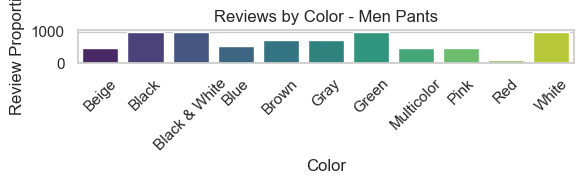

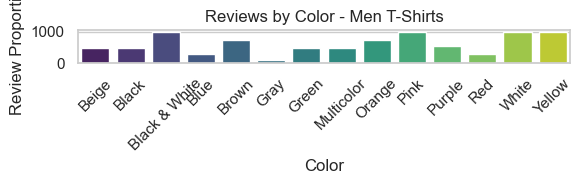

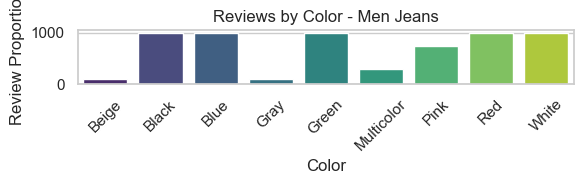

In [12]:
# Review proportion by color
# Step 1: Filter the DataFrame to include only the desired categories
categories_of_interest = ['Men Shirts', 'Men Pants', 'Men T-Shirts', "Men Jeans"]
df_filtered = df[df['category_name'].isin(categories_of_interest)]

# Step 2: Group by 'category_name' and 'color' and get the median reviews_count per group
reviews_by_category_and_color = df_filtered.groupby(["category_name", "color"])["reviews_count"].median().reset_index(name='total_reviews')
reviews_by_category_and_color

# Create bar plots for each category
for category in categories_of_interest:
    # Create the bar plot
    plt.figure(figsize=(6, 2))
    sns.barplot(data=reviews_by_category_and_color.loc[reviews_by_category_and_color["category_name"]==category], 
                x='color', y="total_reviews", hue="color", palette='viridis')
    # Labels and title
    plt.xlabel('Color')
    plt.ylabel('Review Proportion')
    plt.title(f'Reviews by Color - {category}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


C:\Users\saezg\AppData\Local\Temp\ipykernel_28384\3305245802.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df_filtered.groupby(['category_name', 'color']).apply(


    category_name       color  correlation
0     Men Blazers       Black    -1.000000
1     Men Hoodies       Beige     0.271107
2     Men Hoodies       Black    -0.387658
3     Men Hoodies        Blue     0.997949
4     Men Hoodies       Brown     0.450689
..            ...         ...          ...
68   Men T-Shirts       White     0.282996
69   Men T-Shirts      Yellow    -0.333333
70  Men Tank Tops       Black    -0.590301
71  Men Tank Tops  Multicolor    -1.000000
72       Men Tops       Beige     1.000000

[73 rows x 3 columns]


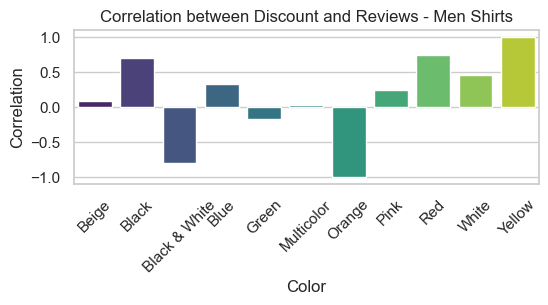

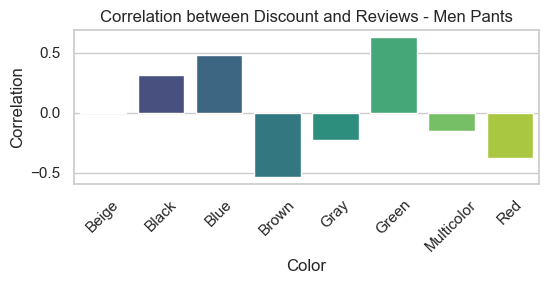

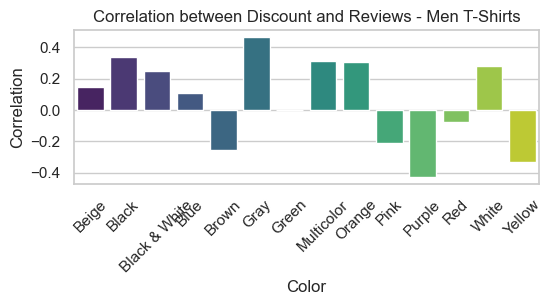

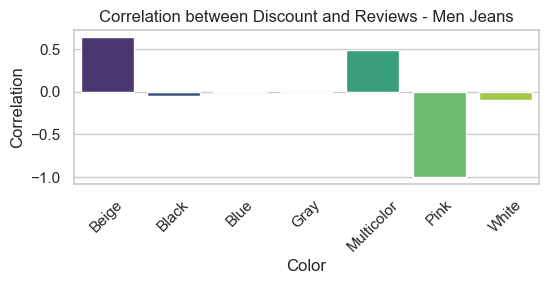

In [14]:
# Step 1: Filter and clean the dataset
df_copy = df.copy()
df_copy['reviews_count'] = df_copy['reviews_count'].replace(0, 1)  # Evita divisiones por 0
df_filtered = df_copy.dropna(subset=['discount_percentage', 'reviews_count'])  # Elimina NaN
df_filtered = df_filtered.groupby(['category_name', 'color']).filter(
    lambda x: x['discount_percentage'].std() > 0 and x['reviews_count'].std() > 0
)  # Filtra grupos con desviación estándar 0

# Step 2: Calculate the correlation between discount percentage and reviews count
correlations = df_filtered.groupby(['category_name', 'color']).apply(
    lambda group: pd.Series({
        'correlation': group['discount_percentage'].corr(group['reviews_count'])
    })
).reset_index()

# Step 3: Print the correlation for each category
print(correlations)

# Step 4: Visualize the correlation for each category
categories = ["Men Shirts", 'Men Pants', 'Men T-Shirts', "Men Jeans"]  # Choose categories of interest
for category in categories:
    category_data = correlations[correlations['category_name'] == category]
    plt.figure(figsize=(6, 2))
    sns.barplot(data=category_data, x='color', y='correlation', palette='viridis', hue='color', dodge=False)
    plt.title(f'Correlation between Discount and Reviews - {category}')
    plt.xlabel('Color')
    plt.ylabel('Correlation')
    plt.xticks(rotation=45)
    plt.legend([], [], frameon=False)  # Remove duplicate legend
    plt.show()